In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

from helper import load_dic_file, extract_displacement_jump

In [3]:
# Load all files
file_pattern = "DIC_Data/Normal/R1_CAFS13/R1_UnLoading_SumDiff/B*.txt"
files = sorted(glob.glob(file_pattern))
files[:5]

['DIC_Data/Normal/R1_CAFS13/R1_UnLoading_SumDiff/B00001.txt',
 'DIC_Data/Normal/R1_CAFS13/R1_UnLoading_SumDiff/B00002.txt',
 'DIC_Data/Normal/R1_CAFS13/R1_UnLoading_SumDiff/B00003.txt',
 'DIC_Data/Normal/R1_CAFS13/R1_UnLoading_SumDiff/B00004.txt',
 'DIC_Data/Normal/R1_CAFS13/R1_UnLoading_SumDiff/B00005.txt']

In [4]:
df1 = load_dic_file(files[0])
df1

,X-Position,Y-Position,U-Displacement,V-Displacement
0,16.0,16.0,-0.045525,0.014240
1,48.0,16.0,-0.067024,0.056965
2,80.0,16.0,-0.128994,0.133907
3,112.0,16.0,-0.161694,0.192368
4,144.0,16.0,-0.159794,0.195450
...,...,...,...,...
1275,1136.0,1008.0,-0.202568,0.127316
1276,1168.0,1008.0,-0.190678,0.143795
1277,1200.0,1008.0,-0.193935,0.146961
1278,1232.0,1008.0,-0.216518,0.136700


In [16]:
loadings_df = pd.read_excel("DIC_Data/Normal/R1_CAFS13/R1_UnLoading_SumDiff/CAFS13_NormalUnLoading.xlsx")
loadings_df = loadings_df.drop(loadings_df.columns[0], axis=1)
loadings_df.columns = ["UnLoading"]

Loadings = list(loadings_df["UnLoading"])

In [12]:
loadings_df.columns.values[0]

np.float64(6.147)

In [17]:
displacement_jumps = []
for i, file in enumerate(files):
    df = load_dic_file(file)
    delta_v = extract_displacement_jump(df)
    displacement_jumps.append(delta_v)

displacement_jumps[:5]

[np.float64(0.031985134480581684),
 np.float64(0.04978262904911179),
 np.float64(0.044031872137321515),
 np.float64(0.05210638337578366),
 np.float64(0.03719090278866233)]

In [18]:
# Create DataFrame for plotting
data = pd.DataFrame({
    'Applied Load (N)': Loadings[:len(displacement_jumps)],
    'Displacement Jump (pixels)': displacement_jumps
})


In [19]:
data

,Applied Load (N),Displacement Jump (pixels)
0,5.840,0.031985
1,5.521,0.049783
2,5.247,0.044032
3,4.963,0.052106
4,4.653,0.037191
5,4.266,0.012328
6,4.021,0.023714
7,3.751,0.056251
8,3.427,0.007545
9,3.241,0.019014


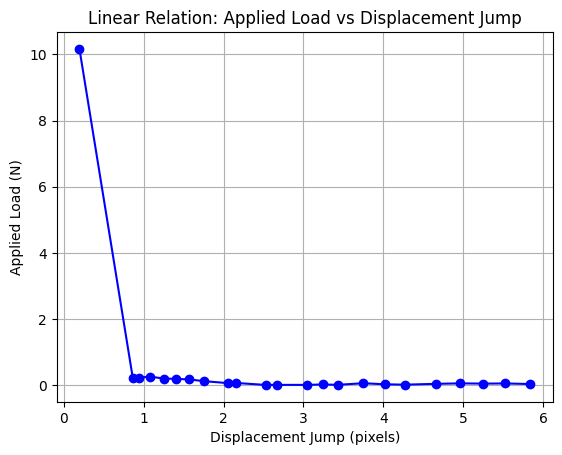

In [20]:
plt.plot(data["Applied Load (N)"], data["Displacement Jump (pixels)"], "bo-")
plt.grid(True)
plt.xlabel('Displacement Jump (pixels)')
plt.ylabel('Applied Load (N)')
plt.title('Linear Relation: Applied Load vs Displacement Jump')

plt.grid(True)
plt.show()

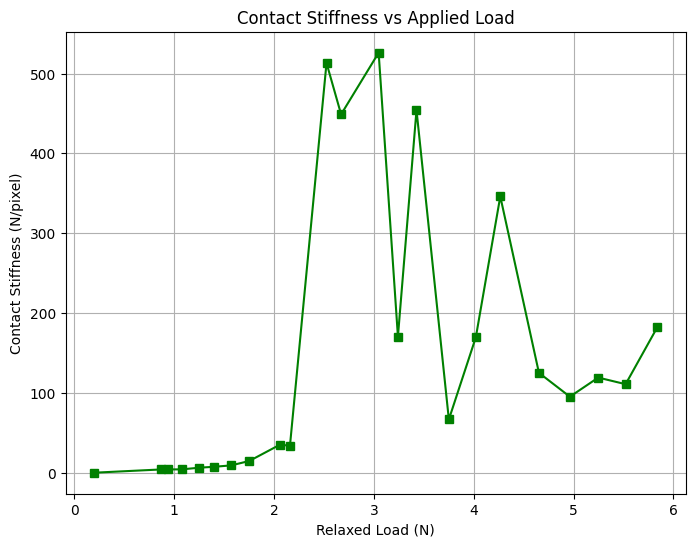

In [25]:
data['Contact Stiffness (N/pixel)'] = data['Applied Load (N)'] / data['Displacement Jump (pixels)']
plt.figure(figsize=(8,6))
plt.plot(data['Applied Load (N)'], data['Contact Stiffness (N/pixel)'], 'gs-')
plt.xlabel('Relaxed Load (N)')
plt.ylabel('Contact Stiffness (N/pixel)')
plt.title('Contact Stiffness vs Applied Load')
plt.grid(True)
plt.show()
